<a href="https://colab.research.google.com/github/omarion3698/phishingUrls/blob/master/phishing_test_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [65]:
# install necessary libraries
!pip install wandb -qU

In [66]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
# Log in to your W&B account
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [106]:
# intialize W&B
wandb.init(project='test_phishing_using_logistic_regression')

accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.83006
classification_report,sklearn.metrics._cla...
f1_score,0.8296
precision,0.83374
recall,0.83006


# Load the Dataset

In [69]:
df = pd.read_csv('/content/sample_data/urlset.csv', encoding='ISO-8859-1')

<ipython-input-69-5ee076fef675>:1: DtypeWarning: Columns (1,2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/urlset.csv', encoding='ISO-8859-1')


In [70]:
# Check the data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96011 entries, 0 to 96010
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96007 non-null  object 
 1   ranking        95955 non-null  object 
 2   mld_res        95937 non-null  object 
 3   mld.ps_res     95926 non-null  object 
 4   card_rem       95925 non-null  float64
 5   ratio_Rrem     95925 non-null  float64
 6   ratio_Arem     95925 non-null  float64
 7   jaccard_RR     95924 non-null  float64
 8   jaccard_RA     95923 non-null  float64
 9   jaccard_AR     95922 non-null  float64
 10  jaccard_AA     95921 non-null  float64
 11  jaccard_ARrd   95921 non-null  object 
 12  jaccard_ARrem  95919 non-null  object 
 13  label          95915 non-null  object 
dtypes: float64(7), object(7)
memory usage: 10.3+ MB


In [71]:
# Display the first few rows of the DataFrame
df.head()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1


In [72]:
# Check last 15 rows of each column
df.tail(15)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
95996,www.gamefaqs.com/computer/doswin/data/926310.html,833,1,1,5.0,169.800000,177.000000,0.004515,0.004338,0.000000,0.000000,0.414634,0.749748,0
95997,www.gamespot.com/condemned-criminal-origins/pl...,753,1,1,4.0,24.250000,21.000000,0.008696,0.009804,0.000000,0.000000,0.111111,0.691589,0
95998,xbox360.gamespy.com/xbox-360/condemned-2-blood...,11812,1,1,3.0,47.333333,48.666667,0.038462,0.044025,0.020000,0.026144,0.55,0.858065,0
95999,xbox360.ign.com/objects/903/903765.html,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0
96000,games.teamxbox.com/xbox-360/1737/Condemned-2-B...,63029,1,0,3.0,47.333333,48.666667,0.006897,0.006711,0.006944,0.006757,0.75,0.858065,0
96001,www.1up.com/do/gameOverview?cId=3159391,11106,1,1,4.0,277.250000,289.250000,0.002681,0.003431,0.002691,0.003442,0.692308,0.802705,0
96002,psx.ign.com/articles/131/131835p1.html,339,1,1,2.0,152.000000,151.000000,0.002825,0.002841,0.000000,0.000000,0.45098,0.830816,0
96003,wii.gamespy.com/wii/cursed-mountain/,11812,1,1,2.0,47.000000,49.000000,0.017857,0.017241,0.000000,0.000000,0.55,0.811321,0
96004,wii.ign.com/objects/142/14270799.html,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0
96005,xbox360.gamespy.com/xbox-360/dead-space/,11812,1,1,3.0,114.000000,128.333333,0.019718,0.020151,0.011461,0.012788,0.55,0.714623,0


In [73]:
# dimensions of the dataset
df.shape

(96011, 14)

In [74]:
# Generate descriptive statistics for the dataset
df.describe()

,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA
count,95925.000000,95925.000000,95925.000000,95924.000000,95923.000000,95922.000000,95921.000000
mean,4.580402,135.252548,138.544869,0.008613,0.003808,0.003378,0.003661
std,4.466075,160.988266,175.478722,0.846011,0.025638,0.024010,0.028492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000
50%,3.000000,104.000000,103.333333,0.000000,0.000000,0.000000,0.000000
75%,6.000000,174.142857,178.300000,0.000000,0.000000,0.000000,0.000000
max,187.333333,5507.000000,6097.000000,183.750000,2.000000,1.000000,1.000000


# Exploratory Data Analysis

In [75]:
# show how many null values are there in each column of the dataset
df.isnull().sum()

domain            4
ranking          56
mld_res          74
mld.ps_res       85
card_rem         86
ratio_Rrem       86
ratio_Arem       86
jaccard_RR       87
jaccard_RA       88
jaccard_AR       89
jaccard_AA       90
jaccard_ARrd     90
jaccard_ARrem    92
label            96
dtype: int64

<Axes: >

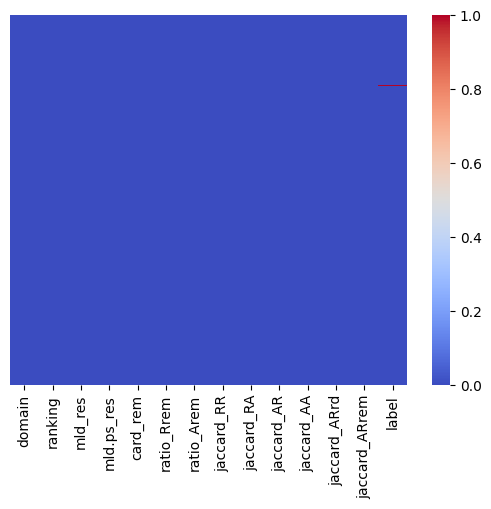

In [76]:
# Visualize the missing values using a heatmap
import seaborn as sns
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='coolwarm')

In [77]:
# Drop missing data
df = df.dropna()

In [78]:
# Check missing data
df.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

In [79]:
# Function to check if a column has mixed types
def has_mixed_types(series):
    return series.apply(type).nunique() > 1

# Identify columns with mixed data types
mixed_type_columns = [col for col in df.columns if has_mixed_types(df[col])]

# Convert columns with mixed data types to string type
for col in mixed_type_columns:
    df[col] = df[col].astype(str)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95915 entries, 0 to 96010
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         95915 non-null  object 
 1   ranking        95915 non-null  object 
 2   mld_res        95915 non-null  object 
 3   mld.ps_res     95915 non-null  object 
 4   card_rem       95915 non-null  float64
 5   ratio_Rrem     95915 non-null  float64
 6   ratio_Arem     95915 non-null  float64
 7   jaccard_RR     95915 non-null  float64
 8   jaccard_RA     95915 non-null  float64
 9   jaccard_AR     95915 non-null  float64
 10  jaccard_AA     95915 non-null  float64
 11  jaccard_ARrd   95915 non-null  object 
 12  jaccard_ARrem  95915 non-null  object 
 13  label          95915 non-null  object 
dtypes: float64(7), object(7)
memory usage: 11.0+ MB


# Convert categorical features

In [81]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'columns' is a list of categorical column names
for col in df.columns:
  df[col] = LabelEncoder().fit_transform(df[col])


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95915 entries, 0 to 96010
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   domain         95915 non-null  int64
 1   ranking        95915 non-null  int64
 2   mld_res        95915 non-null  int64
 3   mld.ps_res     95915 non-null  int64
 4   card_rem       95915 non-null  int64
 5   ratio_Rrem     95915 non-null  int64
 6   ratio_Arem     95915 non-null  int64
 7   jaccard_RR     95915 non-null  int64
 8   jaccard_RA     95915 non-null  int64
 9   jaccard_AR     95915 non-null  int64
 10  jaccard_AA     95915 non-null  int64
 11  jaccard_ARrd   95915 non-null  int64
 12  jaccard_ARrem  95915 non-null  int64
 13  label          95915 non-null  int64
dtypes: int64(14)
memory usage: 11.0 MB


In [83]:
# Select binary classification for simplicity
df = df[df['label'] != 2]

In [84]:
# Features and target
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset and train

In [85]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Initialize the model
log_reg_model = LogisticRegression(max_iter=1600)

In [87]:
# Train the model
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1600)

Increasing 'max_iter' allows the logistic regression solver more iterations to converge to an optimal solution, especially if the algorithm hasn't fully converged within the default limit. This can help resolve convergence warnings and improve model performance.



In [103]:
# Use the trained model to make predictions on the test data
predictions = log_reg_model.predict(X_test)
predictions

array([3, 3, 3, ..., 3, 0, 3])

In [88]:
# log the model hyperparameters
wandb.config.update({
    'model_type': 'Logistic Regression',
    'max_iter': 1600,
    'learning_rate': 0.01,
    'batch_size': 32,
    'epochs': 10,
    'optimizer': 'Omar',
})

# Evaluate the model

In [89]:
# predict on the test set
y_pred = log_reg_model.predict(X_test)

In [90]:
y_pred

array([3, 3, 3, ..., 3, 0, 3])

In [91]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8300578637335141


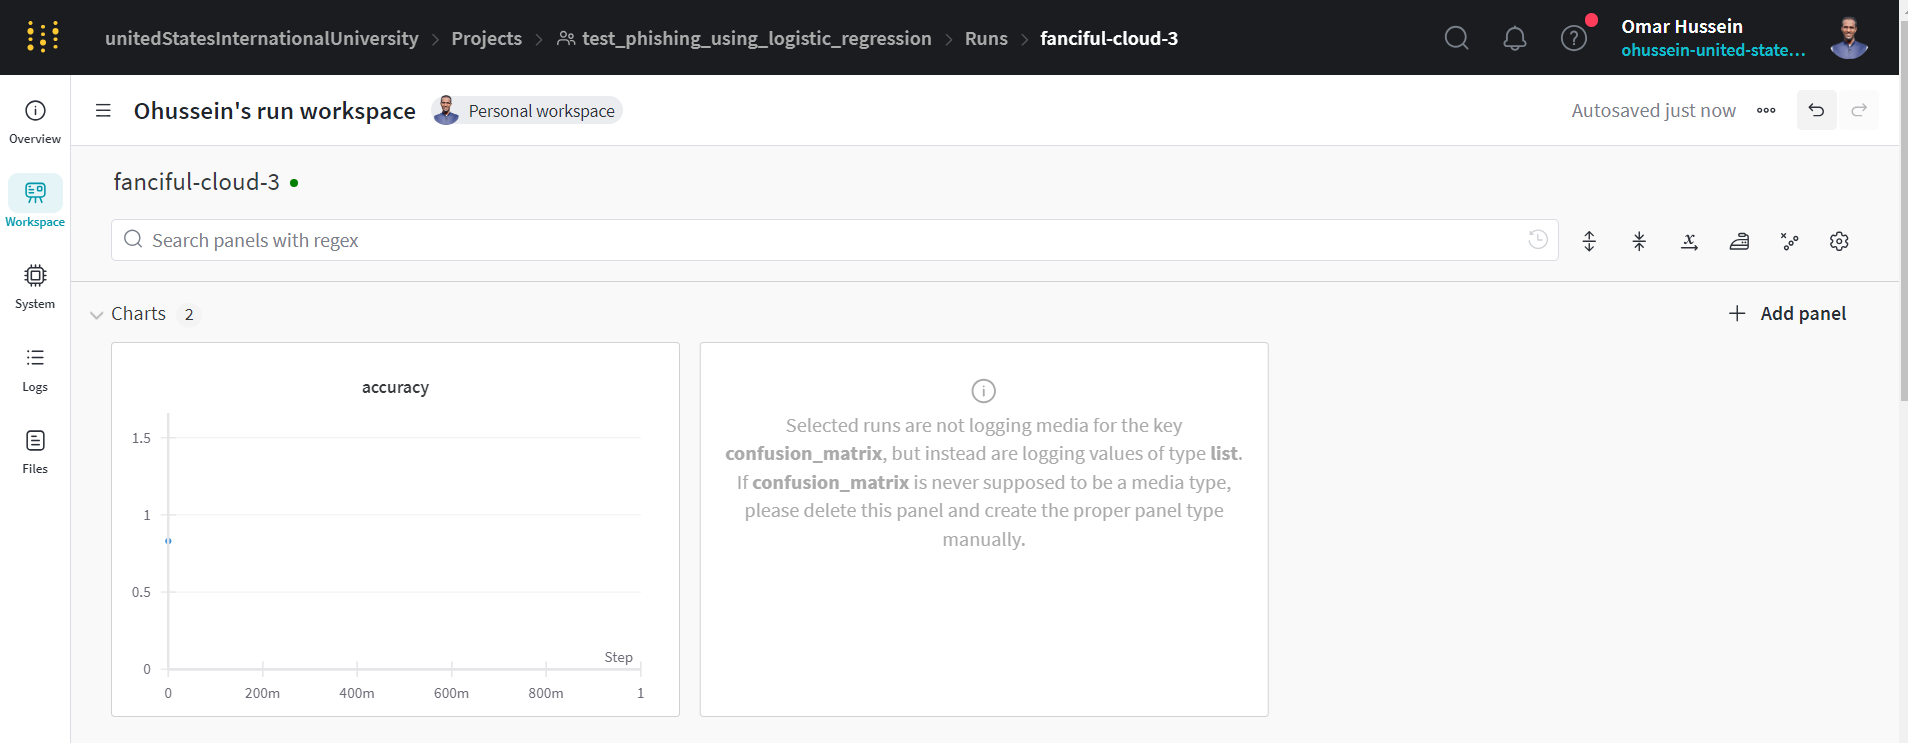

In [92]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[8451, 1128],
       [2132, 7472]])

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision, recall and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

In [105]:
# Log metrics to W&B
wandb.log({
    'accuracy': accuracy,
    'confusion_matrix': conf_matrix,
    'precision': precision,
    'recall': recall,
    'f1_score': f1_score
})

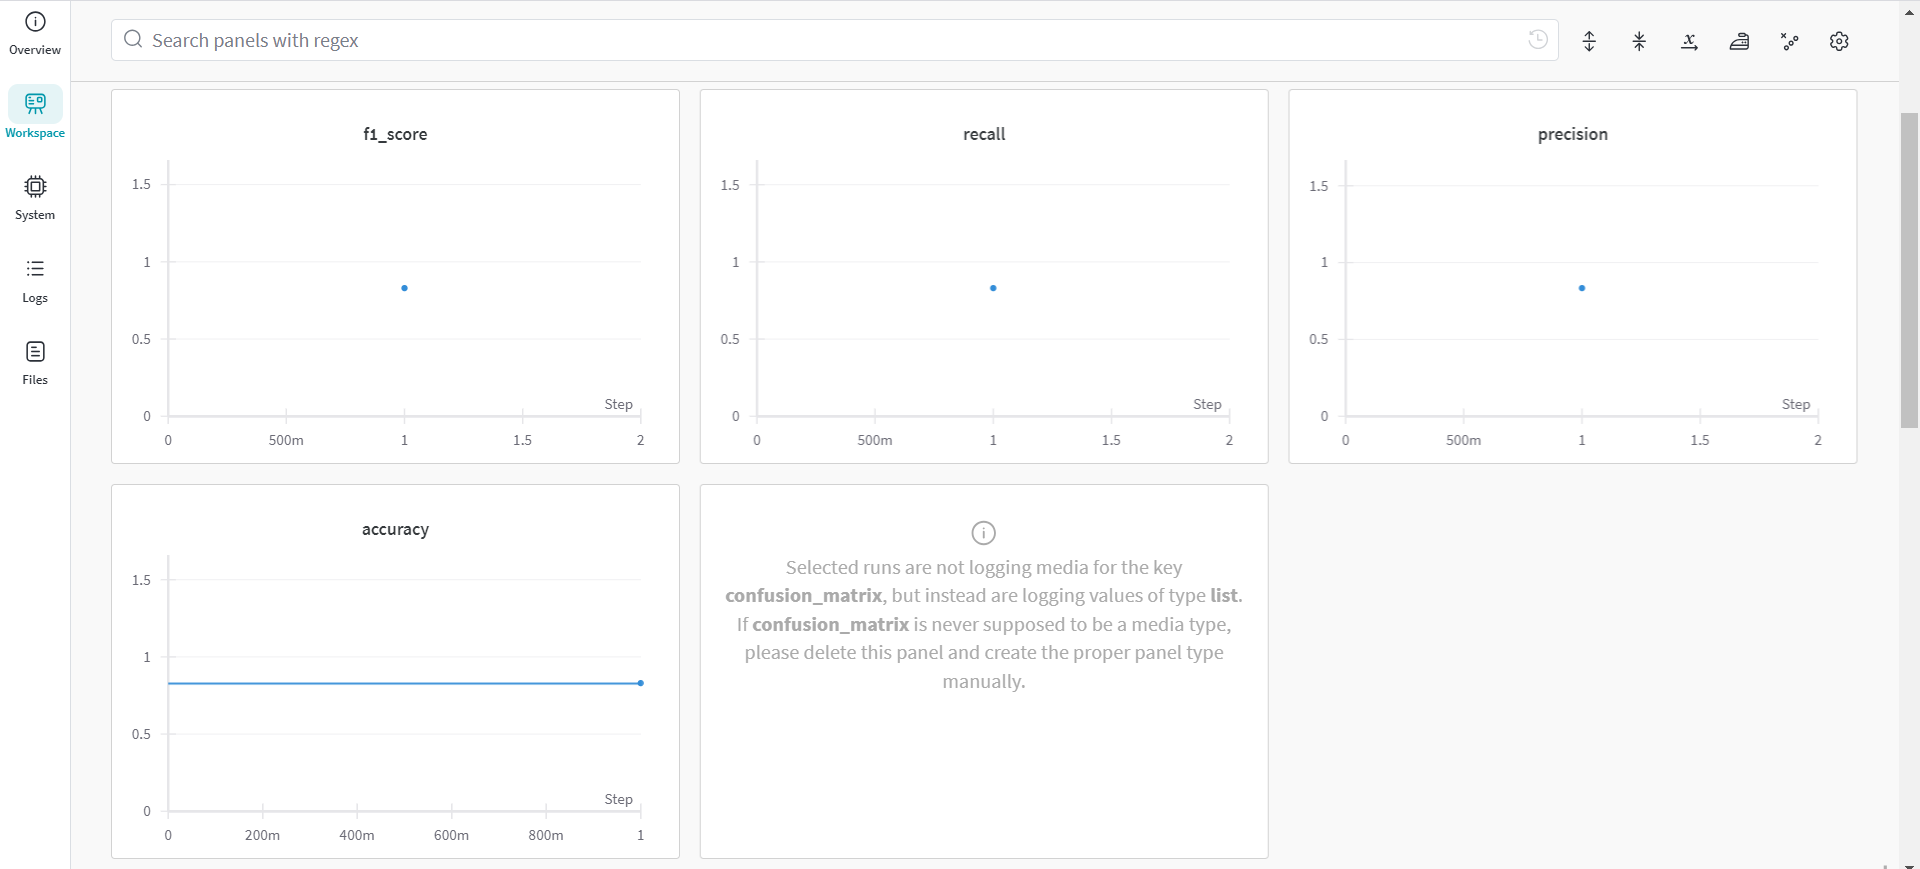

The model achieved an accuracy of 83%, indicatding that it correctly classified 83% of the samples.

The model's precision is 83%, which means that 83% of the samples predicted as positive were indeed positive.

The recall of 83% indicates that the model successfully identified 83% of the actual positive instances.

The F1 score is 83%, reflecting a good balance between precision and recall.

# Save the model

In [99]:
import joblib

# Save the trained model to a file
joblib.dump(log_reg_model, 'log_reg_model.pkl')

['log_reg_model.pkl']

In [100]:
# Loag the model to W&B
wandb.save('log_reg_model.pkl')

['/content/wandb/run-20240721_144803-zzpyedos/files/log_reg_model.pkl']

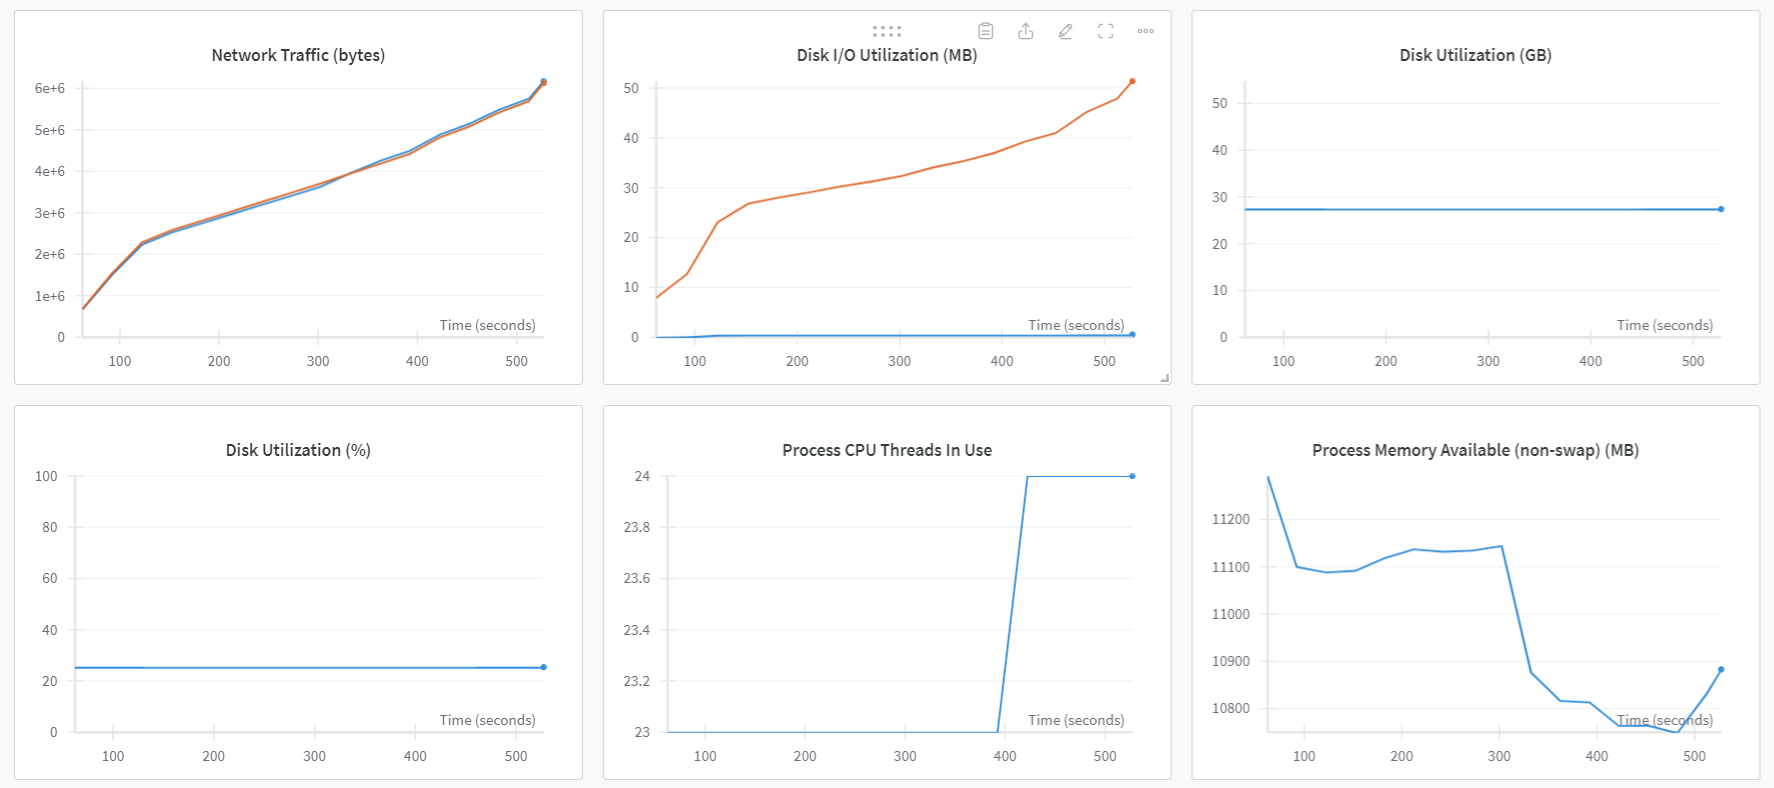

The provided graphs indicate moderate system utilization with a burst of high network traffic and disk activity in the first 100 seconds. CPU and memory usage remained low throughout the measurement period.